<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/Final_Z_Inception_RestNetV2(3)_NonTuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    # rotation_range=20,
     #width_shift_range=0.1,
    # shear_range=0.1,
     zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [ ]:
train = image_generator.flow_from_directory('/content/drive/MyDrive/CovidDataset/CovidDataset/Train', 
                                            batch_size=32, 
                                            shuffle=True, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

validation =image_generator.flow_from_directory('/content/drive/MyDrive/CovidDataset/CovidDataset/Val', 
                                                batch_size=32, 
                                                shuffle=False, 
                                                class_mode='categorical',
                                                target_size=(224, 224))

test =image_generator.flow_from_directory('/content/drive/MyDrive/CovidDataset/CovidDataset/Test', 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

Found 8376 images belonging to 3 classes.
Found 2792 images belonging to 3 classes.
Found 2790 images belonging to 3 classes.


In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

from keras.layers import Dropout
from keras.layers import Input, Flatten, Dense
from keras.models import Model


# Finetuning on another 100-class dataset
base_model = InceptionResNetV2(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet', pooling='avg')
base_model.trainable = False
outputs = Dense(3, activation='softmax')(base_model.output)
model = Model(base_model.inputs, outputs)


model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])



In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 111, 111, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 111, 111, 32) 0           batch_normalization_203[0][0]    
____________________________________________________________________________________________

In [ ]:
r = model.fit(
    train, 
    epochs=35,
    validation_data=validation,
    validation_steps=50
)

Epoch 1/35
262/262 [==============================] - 3307s 12s/step - loss: 0.5623 - accuracy: 0.7492 - val_loss: 0.4071 - val_accuracy: 0.8275
Epoch 2/35
262/262 [==============================] - 198s 756ms/step - loss: 0.2904 - accuracy: 0.8834 - val_loss: 0.3467 - val_accuracy: 0.8450
Epoch 3/35
262/262 [==============================] - 198s 756ms/step - loss: 0.2617 - accuracy: 0.8845 - val_loss: 0.2989 - val_accuracy: 0.8806
Epoch 4/35
262/262 [==============================] - 197s 753ms/step - loss: 0.2560 - accuracy: 0.8970 - val_loss: 0.3103 - val_accuracy: 0.8744
Epoch 5/35
262/262 [==============================] - 196s 749ms/step - loss: 0.2293 - accuracy: 0.9060 - val_loss: 0.3300 - val_accuracy: 0.8681
Epoch 6/35
262/262 [==============================] - 196s 750ms/step - loss: 0.2200 - accuracy: 0.9071 - val_loss: 0.3217 - val_accuracy: 0.8737
Epoch 7/35
262/262 [==============================] - 198s 756ms/step - loss: 0.2379 - accuracy: 0.9007 - val_loss: 0.2904 - 

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

# evaluation = model.evaluate(train)
# print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

2790/2790 [==============================] - 1141s 409ms/step - loss: 0.2638 - accuracy: 0.9007
Test Accuracy: 90.07%


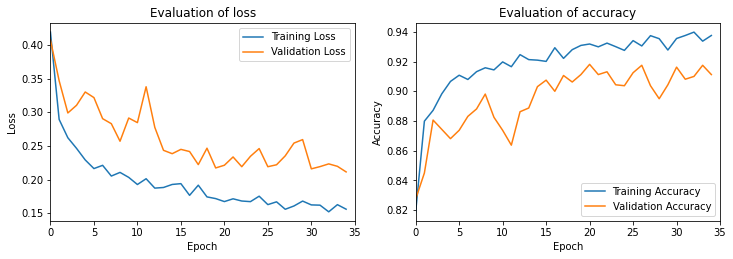

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Training Loss',scalex=True)
plt.plot(r.history['val_loss'], label='Validation Loss',scalex=True)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.xlim(0,35)
plt.legend()
plt.title('Evaluation of loss')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xlim(0,35)
plt.legend()
plt.title('Evaluation of accuracy')
plt.savefig("irnv2_curve3.png")



In [ ]:
from keras.utils.np_utils import to_categorical 
num_classes=len(test.class_indices)

test_labels = test.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes) 
test_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# rounded_labels=np.argmax(test, axis=1)

pred = model.predict(test)
# pred = np.argmax(predictions, axis=1)

y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(test_labels, axis=1)


cnf_matrix=confusion_matrix(y_test, y_pred)

pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))


,0,1,2,accuracy,macro avg,weighted avg
precision,0.893665,0.809342,0.996499,0.893548,0.899836,0.899836
recall,0.849462,0.912903,0.918280,0.893548,0.893548,0.893548
f1-score,0.871003,0.858009,0.955792,0.893548,0.894935,0.894935
support,930.000000,930.000000,930.000000,0.893548,2790.000000,2790.000000


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[790 139   1]
 [ 79 849   2]
 [ 15  61 854]]


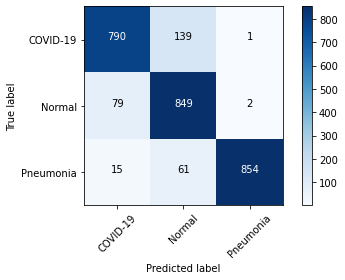

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COVID-19', 'Normal', 'Pneumonia'])
plt.savefig("IRNV2_CONFUTIONMATRIX3.png")


In [ ]:
model.save('irnv2_model_final_1.h5')